# Health and Nutrition Data Exploration
Dataset: https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics

### 1) Download the dataset and save it to a sqlite database

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt

In [2]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

In [4]:
eng = create_engine('sqlite:///healthdata.db')

In [5]:
import os
os.getcwd()

'/home/rep/github/csda1000_FT/day5/3. Assignment'

In [6]:
df = pd.read_csv('data.csv')
df.shape

(89010, 61)

In [7]:
df.to_sql('world_health', eng)

ValueError: Table 'world_health' already exists.

### 2) How many countries are listed in this dataset?

In [ ]:
df.columns

In [8]:
df.rename(columns={'"Country Name"':'country_name'}, inplace=True)

In [9]:
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016']
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [10]:
len(df['Country Name'].unique())

258

### 3) How many unique indicators are there?

In [11]:
len(df['Indicator Name'].unique())

345

In [12]:
258*345

89010

In [13]:
df.shape

(89010, 61)

### 4) Which indicator has the highest percent increase from 1960 to 2016?

In [14]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994        

In [15]:
df['delta'] = df['2015'] - df['1960']
df['delta'].sample(20)

82258              NaN
87946              NaN
41879              NaN
80121              NaN
22241    358458.000000
32863              NaN
85210              NaN
85871              NaN
11223              NaN
60624         0.707589
27613      -299.000000
75037    146181.000000
8610               NaN
19231        -0.390802
40872      2176.000000
53863      1376.000000
48705    352521.000000
47743              NaN
87736              NaN
49677              NaN
Name: delta, dtype: float64

In [16]:
df['delta_pct'] = df['delta'] / df['1960']

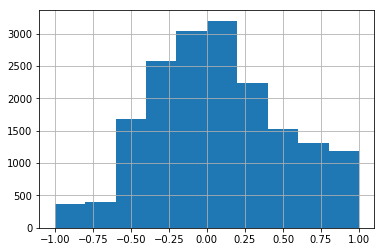

In [17]:
df['delta_pct'].hist(range=(-1, 1))

In [18]:
df.sort_values('delta_pct', ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
84691,United Arab Emirates,ARE,Male population 40-44,SP.POP.4044.MA,2042.00000,2210.00000,2552.0000,3036.00000,3612.00000,4246.00000,...,5.678160e+05,6.464840e+05,7.223140e+05,7.914710e+05,8.495750e+05,8.933150e+05,9.230060e+05,NaN,920964.0,451.010774
84690,United Arab Emirates,ARE,Male population 35-39,SP.POP.3539.MA,2410.00000,2793.00000,3394.0000,4174.00000,5058.00000,5992.00000,...,8.817950e+05,1.007670e+06,1.074895e+06,1.100170e+06,1.091885e+06,1.068473e+06,1.046110e+06,NaN,1043700.0,433.070539
84689,United Arab Emirates,ARE,Male population 30-34,SP.POP.3034.MA,2825.00000,3464.00000,4348.0000,5436.00000,6632.00000,7866.00000,...,1.051050e+06,1.149894e+06,1.163400e+06,1.143938e+06,1.107728e+06,1.073235e+06,1.052494e+06,NaN,1049669.0,371.564248
84692,United Arab Emirates,ARE,Male population 45-49,SP.POP.4549.MA,1705.00000,1760.00000,1931.0000,2180.00000,2472.00000,2805.00000,...,3.880370e+05,4.408220e+05,4.845210e+05,5.123510e+05,5.316720e+05,5.547440e+05,5.889040e+05,NaN,587199.0,344.398240
84688,United Arab Emirates,ARE,Male population 25-29,SP.POP.2529.MA,3305.00000,4208.00000,5389.0000,6802.00000,8329.00000,9882.00000,...,9.480200e+05,1.018289e+06,1.013105e+06,9.942950e+05,9.712830e+05,9.488960e+05,9.267120e+05,NaN,923407.0,279.396974
84693,United Arab Emirates,ARE,Male population 50-54,SP.POP.5054.MA,1448.00000,1411.00000,1474.0000,1601.00000,1760.00000,1937.00000,...,1.967190e+05,2.310410e+05,2.704480e+05,3.072830e+05,3.397610e+05,3.675650e+05,3.923400e+05,NaN,390892.0,269.953039
84751,United Arab Emirates,ARE,"Population ages 15-64, male",SP.POP.1564.MA.IN,24237.00000,28653.00000,34669.0000,41768.00000,49084.00000,56064.00000,...,5.154192e+06,5.617279e+06,5.867720e+06,5.979957e+06,5.995103e+06,5.978320e+06,5.978641e+06,NaN,5954404.0,245.674135
84588,United Arab Emirates,ARE,"Age population, age 25, male, interpolated",SP.POP.AG25.MA.IN,702.00000,905.00000,1163.0000,1469.00000,1809.00000,2157.00000,...,1.712340e+05,1.822990e+05,1.819110e+05,1.807470e+05,1.764150e+05,1.672380e+05,1.549800e+05,NaN,154278.0,219.769231
84586,United Arab Emirates,ARE,"Age population, age 24, male, interpolated",SP.POP.AG24.MA.IN,723.00000,937.00000,1206.0000,1535.00000,1893.00000,2245.00000,...,1.599580e+05,1.693430e+05,1.705040e+05,1.676720e+05,1.589150e+05,1.463330e+05,1.345740e+05,NaN,133851.0,185.132780
84694,United Arab Emirates,ARE,Male population 55-59,SP.POP.5559.MA,1181.00000,1093.00000,1074.0000,1099.00000,1148.00000,1211.00000,...,8.994000e+04,1.010720e+05,1.207380e+05,1.403140e+05,1.596100e+05,1.797030e+05,2.018980e+05,NaN,200717.0,169.955123


In [19]:
indicator_means = df.groupby(['Indicator Name', 'Indicator Code']).mean()
indicator_means.head()

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.714286,28.683333,26.050000,30.788462,27.626667,30.900000,27.550000,NaN,NaN,NaN
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.018182,40.380000,35.309091,32.705263,34.100000,43.707692,29.975000,NaN,NaN,NaN
AIDS estimated deaths (UNAIDS estimates),SH.DYN.AIDS.DH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28475.000000,26716.666667,25300.925926,24684.259259,22799.074074,21008.333333,19574.074074,NaN,NaN,NaN
ARI treatment (% of children under 5 taken to a health provider),SH.STA.ARIC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.241667,58.055172,60.133333,60.548934,57.217647,60.964516,39.850000,NaN,NaN,NaN
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,100.790334,100.763747,100.715669,100.16419,99.616816,99.078409,98.53104,97.988857,97.252911,96.520806,...,53.125731,52.153911,51.179432,50.205153,48.982447,47.757417,NaN,NaN,NaN,NaN


In [20]:
indicator_means.sample(5)

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
"Population ages 75-79, female (% of female population)",SP.POP.7579.FE.5Y,0.966313,0.976188,0.986321,0.994828,0.999779,1.001840,1.005136,1.004384,1.003382,1.007802,...,1.684745,1.705520,1.723344,1.758768,1.791156,1.818175,1.837074,NaN,0.863831,0.958262
"Literacy rate, youth total (% of people ages 15-24)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.060802,89.768228,94.076425,91.583692,95.378131,92.919316,90.622322,NaN,NaN,NaN
"Age population, age 12, female, interpolated",SP.POP.AG12.FE.IN,156264.072917,162921.552083,169809.119792,176781.453125,184455.989583,190990.453125,193753.255208,195229.338542,197532.734375,199851.255208,...,295183.164948,292475.174359,292708.482051,295405.603093,297074.963918,299098.757732,301351.840206,NaN,148473.408377,1.926445
Adults (ages 15+) and children (0-14 years) living with HIV,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,571480.555556,580941.666667,589333.333333,597937.962963,608550.000000,621529.629630,634082.407407,NaN,NaN,NaN
Sex ratio at birth (male births per female births),SP.POP.BRTH.MF,NaN,NaN,1.049717,NaN,NaN,NaN,NaN,1.049600,NaN,NaN,...,1.053735,1.053720,1.053721,1.053725,1.053530,1.053697,NaN,NaN,NaN,NaN


In [21]:
indicator_means.shape

(345, 59)

In [22]:
indicator_means.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'delta', 'delta_pct'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc282bab00>]],
      dtype=object)

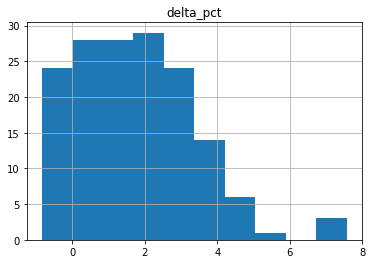

In [23]:
indicator_means.hist('delta_pct')

In [24]:
indicator_means.sort_values('delta_pct', ascending=False)[['1960', '2015', 'delta_pct']]

,,1960,2015,delta_pct
Indicator Name,Indicator Code,,,
Male population 80+,SP.POP.80UP.MA,2.295487e+05,1.664041e+06,7.568853
Female population 80+,SP.POP.80UP.FE,3.843597e+05,2.648528e+06,7.567660
Urban population,SP.URB.TOTL,3.228826e+07,1.321705e+08,7.281010
Male population 40-44,SP.POP.4044.MA,2.766925e+06,8.994947e+06,5.323497
Male population 35-39,SP.POP.3539.MA,3.265662e+06,9.276161e+06,4.975002
Male population 75-79,SP.POP.7579.MA,3.646647e+05,1.786618e+06,4.770112
Male population 30-34,SP.POP.3034.MA,3.858900e+06,1.033908e+07,4.746620
Male population 45-49,SP.POP.4549.MA,2.611358e+06,8.344219e+06,4.633512
Female population 75-79,SP.POP.7579.FE,5.389652e+05,2.269449e+06,4.381448


### 5) Which country has the lowest infant mortality rate? Which has the highest?

In [25]:
[col for col in df['Indicator Name'] if 'mortality' in col.lower()]

['Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality caused by road traffic injury (per 100,000 people)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female (per 1,000 live births)',
 'Mortality rate, infant, male (per 1,000 live births)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Mortality rate, under-5 (per 1,000)',
 'Mortality rate, under-5, female (per 1,000)',
 'Mortality rate, under-5, male (per 1,000)',
 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality caused by road traffic injury (per 100,000 people)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male 

In [26]:
infant_mortality_cols = [col for col in df['Indicator Name'].unique() if 'mortality rate, infant' in col.lower()]
infant_mortality_cols

['Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female (per 1,000 live births)',
 'Mortality rate, infant, male (per 1,000 live births)']

In [27]:
infant_mortality = df.set_index('Indicator Name').loc['Mortality rate, infant (per 1,000 live births)', :]
infant_mortality.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Mortality rate, infant (per 1,000 live births)",Arab World,ARB,SP.DYN.IMRT.IN,159.950234,155.313614,152.233048,156.521984,152.166551,148.067799,144.187635,...,33.353477,32.281703,31.235308,30.333652,29.464477,28.684421,27.983485,NaN,-131.966748,-0.825049
"Mortality rate, infant (per 1,000 live births)",Caribbean small states,CSS,SP.DYN.IMRT.IN,62.071399,59.750105,57.674457,55.780086,54.086982,52.611683,51.232003,...,19.221879,18.796829,18.398032,18.020542,17.618756,17.173067,16.767874,NaN,-45.303525,-0.729862
"Mortality rate, infant (per 1,000 live births)",Central Europe and the Baltics,CEB,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.172798,6.746708,6.382763,6.129705,5.920011,5.754447,5.597554,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Early-demographic dividend,EAR,SP.DYN.IMRT.IN,160.306945,156.956835,153.793454,148.708240,145.800851,143.095448,140.508436,...,41.713548,40.237457,38.615829,37.192102,35.877246,34.658242,33.553852,NaN,-126.753093,-0.790690
"Mortality rate, infant (per 1,000 live births)",East Asia & Pacific,EAS,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.209825,18.211707,17.272660,16.363209,15.532499,14.802407,14.184070,NaN,NaN,NaN


In [28]:
infant_mortality.sort_values('2015').head(30)

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Mortality rate, infant (per 1,000 live births)",Luxembourg,LUX,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,25.400000,24.400000,23.400000,...,2.000000,1.900000,1.800000,1.600000,1.600000,1.600000,1.50000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Iceland,ISL,SP.DYN.IMRT.IN,17.500000,17.200000,16.900000,16.400000,16.000000,15.500000,15.000000,...,1.900000,1.900000,1.800000,1.700000,1.600000,1.600000,1.60000,NaN,-15.900000,-0.908571
"Mortality rate, infant (per 1,000 live births)",Finland,FIN,SP.DYN.IMRT.IN,21.900000,20.600000,19.500000,18.400000,17.400000,16.600000,15.800000,...,2.600000,2.500000,2.400000,2.200000,2.100000,2.000000,1.90000,NaN,-20.000000,-0.913242
"Mortality rate, infant (per 1,000 live births)",Japan,JPN,SP.DYN.IMRT.IN,30.400000,27.900000,25.500000,23.200000,21.000000,19.100000,17.500000,...,2.400000,2.400000,2.300000,2.200000,2.100000,2.100000,2.00000,NaN,-28.400000,-0.934211
"Mortality rate, infant (per 1,000 live births)",Norway,NOR,SP.DYN.IMRT.IN,18.400000,18.000000,17.500000,17.100000,16.600000,16.000000,15.400000,...,2.700000,2.600000,2.500000,2.300000,2.300000,2.200000,2.00000,NaN,-16.400000,-0.891304
"Mortality rate, infant (per 1,000 live births)",Andorra,ADO,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.600000,2.500000,2.400000,2.300000,2.200000,2.100000,2.10000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Slovenia,SVN,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800000,2.700000,2.600000,2.400000,2.300000,2.200000,2.10000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Singapore,SGP,SP.DYN.IMRT.IN,35.500000,32.900000,30.800000,29.300000,28.300000,27.300000,26.400000,...,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.10000,NaN,-33.400000,-0.940845
"Mortality rate, infant (per 1,000 live births)",Estonia,EST,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.600000,3.200000,2.900000,2.700000,2.500000,2.30000,NaN,NaN,NaN


### 6) What metrics could be utilized to represent health?

### 7) How many invalid data points can you find?

In [29]:
df.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              53528
1961              53685
1962              53121
1963              53558
1964              53527
1965              53407
1966              53472
1967              52988
1968              53433
1969              53380
1970              52100
1971              51432
1972              50995
1973              51468
1974              51436
1975              51250
1976              51232
1977              50806
1978              51213
1979              51162
1980              50432
1981              50181
1982              49828
1983              50238
1984              50046
1985              49990
                  ...  
1989              49728
1990              41288
1991              41779
1992              41087
1993              41612
1994              41332
1995              37684
1996              37624
1997              37450
1998              37606
1999            

In [30]:
df.set_index(['Country Name', 'Indicator Name', 'Indicator Code']).dropna(how='any').shape

(0, 60)

In [31]:
indicator_means.isnull().sum()

1960         173
1961         172
1962         170
1963         174
1964         172
1965         172
1966         169
1967         170
1968         173
1969         168
1970         132
1971         137
1972         151
1973         149
1974         138
1975         131
1976         143
1977         141
1978         142
1979         143
1980         126
1981         126
1982         134
1983         125
1984         122
1985         129
1986         119
1987         113
1988         117
1989         116
1990          64
1991          62
1992          58
1993          60
1994          57
1995          41
1996          37
1997          39
1998          38
1999          36
2000          19
2001          29
2002          25
2003          27
2004          27
2005          21
2006          23
2007          21
2008          21
2009          19
2010          11
2011          18
2012          17
2013          23
2014          26
2015          91
2016         345
delta        188
delta_pct    1

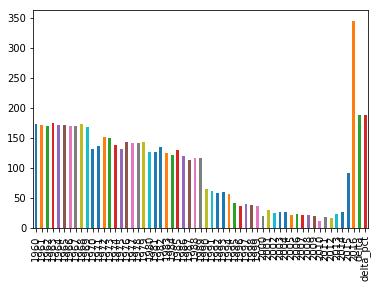

In [32]:
indicator_means.isnull().sum().plot.bar()

In [33]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

### 8) Which metrics are highly correlated? (Hint: Transpose the dataset and use corr)

In [ ]:
indicator_means_t = indicator_means.T
indicator_means_t.head()

In [ ]:
indicator_means_t.columns

In [ ]:
indicator_means_t.dtypes

In [ ]:
correlation_ceof = indicator_means_t.corr()
correlation_ceof

In [ ]:
correlation_ceof.columns = [a for a,b in correlation_ceof.columns]
correlation_ceof.columns

In [ ]:
correlation_ceof.head()

In [ ]:
a = correlation_ceof.stack()
a.head()

In [ ]:
a.sample()

In [ ]:
type(a)

In [ ]:
a.values

In [ ]:
correlation_coefficients = pd.DataFrame(a)
correlation_coefficients

In [ ]:
correlation_coefficients[0]

In [ ]:
c = correlation_coefficients.reset_index()

In [ ]:
c.head()

In [ ]:
c.rename(columns={0:'rsq'}, inplace=True)

c.head()

In [ ]:
type(c['rsq'][0])

In [ ]:
c.to_csv('correlation.csv')

In [ ]:
import numpy as np

In [ ]:
d = pd.read_csv('correlation.csv')
d.head()

In [ ]:
d['rsq']